# **Infected Tomato Leaves Image Classifier**

### **Pre-Processing**

In [1]:
!pip install tensorflow-gpu

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=98d8f163891bbdb3d1233f5e90018d521b68255adb94d1a58dcfebbf7c03152e
  Stored in directory: c:\users\yash\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19553 sha256=8c0594087afdfab909c6cac26233e387cd1090811143d109f54d8e62ed520104
  Stored in directory: c:\users\yash\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built termcolor wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully un

In [3]:
sudo apt-get install --no-install-recommends nvidia-driver-418

SyntaxError: invalid syntax (<ipython-input-3-5871c5704f2f>, line 1)

In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


### **Importing the Needful Libraries**

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


### **Importing the Datasets**

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid (1)'

### **Using Neural Network with Inception V3**

In [ ]:

# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

38903808/87910968 [============>.................] - ETA: 9s

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18395 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid (1)',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1150/1150 [==============================] - 658s 566ms/step - loss: 5.2434 - accuracy: 0.5918 - val_loss: 5.6284 - val_accuracy: 0.7019
Epoch 2/10
1150/1150 [==============================] - 251s 218ms/step - loss: 3.4368 - accuracy: 0.7823 - val_loss: 3.1633 - val_accuracy: 0.8120
Epoch 3/10
1150/1150 [==============================] - 250s 218ms/step - loss: 3.6254 - accuracy: 0.8048 - val_loss: 3.0298 - val_accuracy: 0.8358
Epoch 4/10
1150/1150 [==============================] - 251s 218ms/step - loss: 2.8912 - accuracy: 0.8461 - val_loss: 2.9020 - val_accuracy: 0.8491
Epoch 5/10
1150/1150 [==============================] - 250s 217ms/step - loss: 2.8978 - accuracy: 0.8562 - val_loss: 3.6961 - val_accuracy: 0.8386
Epoch 6/10
1150/1150 [==============================] - 250s 217ms/step - loss: 2.6481 - accuracy: 0.8716 - val_loss: 3.3081 - val_accuracy: 0.8580
Epoch 7/10
1150/1150 [==============================] - 249s 217ms/step - loss: 2.7041 - accuracy: 0.8740 - val_

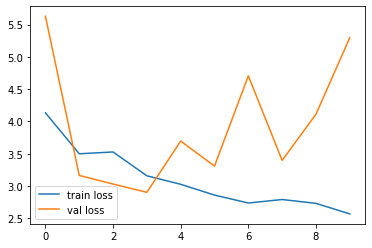

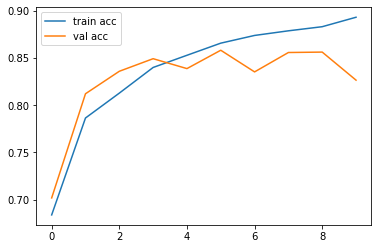

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inception_2.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 9.9999988e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 2.9940563e-16, ..., 2.4083419e-18,
        9.9999571e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([8, 6, 2, ..., 6, 8, 7])

### **Using Neural Network with InceptionResNetV2**  

In [ ]:
inresnet = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)

219062272/219055592 [==============================] - 3s 0us/step


In [ ]:
for layer in inresnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inresnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inresnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18395 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid (1)',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1150/1150 [==============================] - 293s 246ms/step - loss: 4.8673 - accuracy: 0.5928 - val_loss: 3.4666 - val_accuracy: 0.7415
Epoch 2/10
1150/1150 [==============================] - 279s 243ms/step - loss: 2.9674 - accuracy: 0.7893 - val_loss: 2.2190 - val_accuracy: 0.8423
Epoch 3/10
1150/1150 [==============================] - 280s 243ms/step - loss: 2.5947 - accuracy: 0.8296 - val_loss: 2.8718 - val_accuracy: 0.8164
Epoch 4/10
1150/1150 [==============================] - 280s 244ms/step - loss: 2.5062 - accuracy: 0.8446 - val_loss: 3.3987 - val_accuracy: 0.8170
Epoch 5/10
1150/1150 [==============================] - 282s 245ms/step - loss: 2.2924 - accuracy: 0.8640 - val_loss: 2.2663 - val_accuracy: 0.8731
Epoch 6/10
1150/1150 [==============================] - 281s 245ms/step - loss: 2.2826 - accuracy: 0.8719 - val_loss: 2.7926 - val_accuracy: 0.8604
Epoch 7/10
1150/1150 [==============================] - 281s 244ms/step - loss: 2.1810 - accuracy: 0.8827 - val_

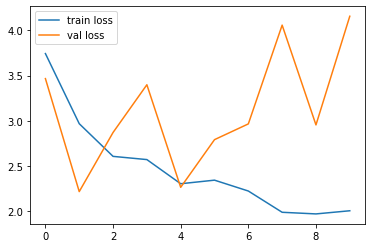

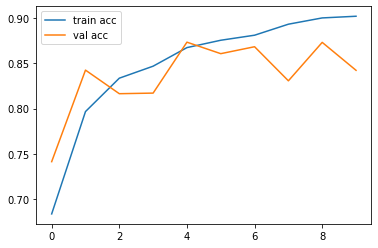

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_inresnet')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_inresnet')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inrestnet.h5')